# Lending Club Case Study

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). 
Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. 
In other words, borrowers who default cause the largest amount of loss to the lenders. 
In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
The company wants to understand the driving factors (or driver variables) behind loan default,
i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. 


In [109]:
#Import all the necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [110]:
#loading data
df=pd.read_csv("C:/Ashwani/Upgrad/Statistics/Case_Study/loan.csv", low_memory=False)

In [111]:
#Checking data loaded properly
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [112]:
df.shape

(39717, 111)

### Data Cleaning - Handling Missing values, Fixing Rows and Columns, Correcting Data, outlier Handling etc.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [114]:
#Finding columns with missing values
df.isnull().sum().tail(30)

mo_sin_old_rev_tl_op              39717
mo_sin_rcnt_rev_tl_op             39717
mo_sin_rcnt_tl                    39717
mort_acc                          39717
mths_since_recent_bc              39717
mths_since_recent_bc_dlq          39717
mths_since_recent_inq             39717
mths_since_recent_revol_delinq    39717
num_accts_ever_120_pd             39717
num_actv_bc_tl                    39717
num_actv_rev_tl                   39717
num_bc_sats                       39717
num_bc_tl                         39717
num_il_tl                         39717
num_op_rev_tl                     39717
num_rev_accts                     39717
num_rev_tl_bal_gt_0               39717
num_sats                          39717
num_tl_120dpd_2m                  39717
num_tl_30dpd                      39717
num_tl_90g_dpd_24m                39717
num_tl_op_past_12m                39717
pct_tl_nvr_dlq                    39717
percent_bc_gt_75                  39717
pub_rec_bankruptcies                697


In [115]:
#Removing Columns with Null Values
df = df.dropna(axis=1, how='all')

In [116]:
df.shape

(39717, 57)

### Columns Reduced to 57 by removing columns with Null values

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [118]:
#Removing columns with unique values
df = df.loc[:, df.nunique()!=1]
df.shape

(39717, 48)

In [119]:
# Since our analysis considers loan status as fully paid or charged off,removing rows with loan status = Current 
df = df[df.loan_status != 'Current']
df.shape

(38577, 48)

In [120]:
#Dropping Customer Behaviour variables
df = df.drop(["id","member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "desc","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", 
"last_pymnt_d", "last_pymnt_amnt", "mths_since_last_delinq","earliest_cr_line", "inq_last_6mths","open_acc", "out_prncp","out_prncp_inv","pub_rec", "revol_util", "total_acc"], axis =1)

In [121]:
df.shape

(38577, 19)

### Rows and Columns removed which were not relevant for analysis. Removed rows where loan status is Current and Columns with Customer Behaviour variables

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt_inv         38577 non-null  float64
 2   term                    38577 non-null  object 
 3   int_rate                38577 non-null  object 
 4   installment             38577 non-null  float64
 5   grade                   38577 non-null  object 
 6   sub_grade               38577 non-null  object 
 7   emp_length              37544 non-null  object 
 8   home_ownership          38577 non-null  object 
 9   annual_inc              38577 non-null  float64
 10  verification_status     38577 non-null  object 
 11  issue_d                 38577 non-null  object 
 12  loan_status             38577 non-null  object 
 13  purpose                 38577 non-null  object 
 14  addr_state              38577 non-null

In [123]:
df['term'] = df['term'].str.rstrip('months')
df['term'] = df['term'].astype('int64')
df.term.value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [124]:
df['int_rate'] = df['int_rate'].str.rstrip('%')
df['int_rate']= df['int_rate'].astype('float64')
df.int_rate.value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt_inv         38577 non-null  float64
 2   term                    38577 non-null  int64  
 3   int_rate                38577 non-null  float64
 4   installment             38577 non-null  float64
 5   grade                   38577 non-null  object 
 6   sub_grade               38577 non-null  object 
 7   emp_length              37544 non-null  object 
 8   home_ownership          38577 non-null  object 
 9   annual_inc              38577 non-null  float64
 10  verification_status     38577 non-null  object 
 11  issue_d                 38577 non-null  object 
 12  loan_status             38577 non-null  object 
 13  purpose                 38577 non-null  object 
 14  addr_state              38577 non-null

In [126]:
df['emp_length'] = df['emp_length'].str.rstrip('years ')
df['emp_length'] = df['emp_length'].str.rstrip('year ')
df['emp_length'].replace({'10+':10}, inplace=True)
df['emp_length'][df['emp_length']=='< 1']= 1
df['emp_length'] = df['emp_length'].astype('float64')
df.emp_length.value_counts()

10.0    8488
1.0     7677
2.0     4291
3.0     4012
4.0     3342
5.0     3194
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

### Removed unwanted letters from cells and converted columns to Int and Float data types for Analysis Purposes

In [127]:
#Reset the index
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt_inv         38577 non-null  float64
 2   term                    38577 non-null  int64  
 3   int_rate                38577 non-null  float64
 4   installment             38577 non-null  float64
 5   grade                   38577 non-null  object 
 6   sub_grade               38577 non-null  object 
 7   emp_length              37544 non-null  float64
 8   home_ownership          38577 non-null  object 
 9   annual_inc              38577 non-null  float64
 10  verification_status     38577 non-null  object 
 11  issue_d                 38577 non-null  object 
 12  loan_status             38577 non-null  object 
 13  purpose                 38577 non-null  object 
 14  addr_state              38577 non-null

# Univariate Analysis

Loan Status

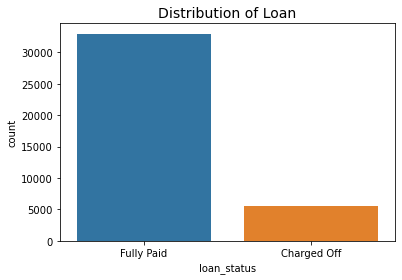

In [128]:
sns.countplot(df.loan_status)
plt.title("Distribution of Loan", fontsize = 14)
plt.show()

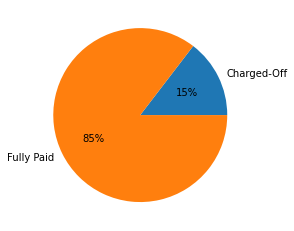

In [129]:
#Plot a pie chart
result = plt.pie(df.groupby('loan_status')['loan_status'].count(),labels=['Charged-Off','Fully Paid'],autopct='%.0f%%')
result
plt.show()

### Observations


- Around 15% borrowers have defaulted the loan

Customer Grade

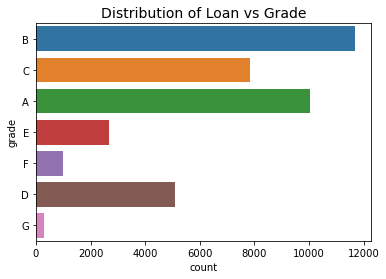

In [130]:
sns.countplot(y = df.grade)
plt.title("Distribution of Loan vs Grade", fontsize = 14)
plt.show()

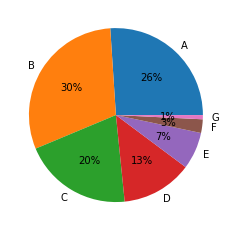

In [131]:
result = plt.pie(df.groupby('grade')['grade'].count(),labels=['A','B','C','D','E','F','G'],autopct='%.0f%%')
result
plt.show()

### Observations


- Most of the loans borrowed are from high grades (A,B,C)


Employee Length

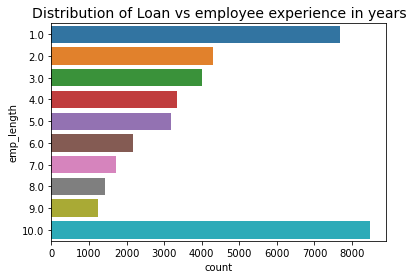

In [132]:
sns.countplot(y = df.emp_length)
plt.title("Distribution of Loan vs employee experience in years", fontsize = 14)
plt.show()

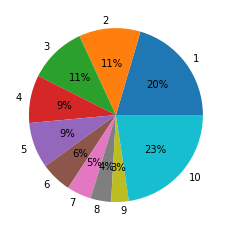

In [133]:
result = plt.pie(df.groupby('emp_length')['emp_length'].count(),labels=['1','2','3','4','5','6','7','8','9','10'],autopct='%.0f%%')
result
plt.show()

### Observations

- Most of the loan borrowers have experience less than 3 years. There is high percentage for borrowers having 10 years or more experience which could be attributed to clubbing of 10+ experiences in the same bracket

Term

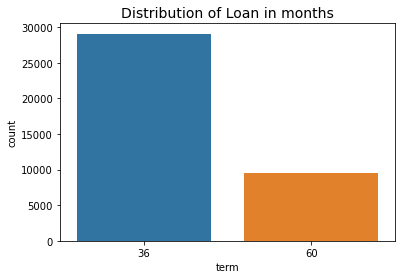

In [134]:
sns.countplot(df.term)
plt.title("Distribution of Loan in months", fontsize = 14)
plt.show()

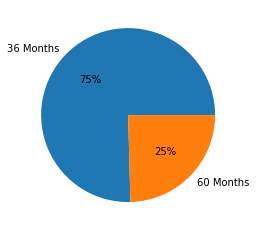

In [135]:
result = plt.pie(df.groupby('term')['term'].count(),labels=['36 Months', '60 Months'],autopct='%.0f%%')
result
plt.show()

### Observations

Borrowers have opted mainly for 36 months loan terms

Borrowers State

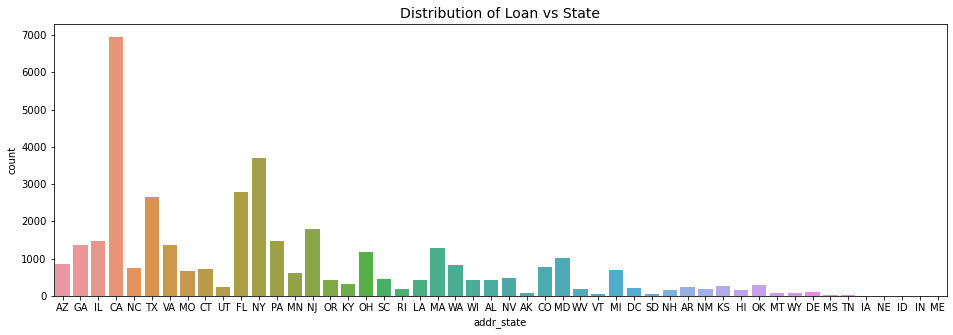

In [136]:
plt.figure(figsize=(16,5))
sns.countplot(df.addr_state)
plt.title("Distribution of Loan vs State", fontsize = 14)
plt.show()

### Observations

Most of the borrowers belong to CA, NY, FL states

In [137]:
df.describe()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,mths_since_last_record,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37544.000000,3.857700e+04,38577.000000,2740.000000,37880.000000
mean,11047.025430,10222.481123,41.898437,11.932219,322.466318,5.061048,6.877797e+04,13.272727,69.260949,0.043479
std,7348.441646,7022.720644,10.333136,3.691327,208.639215,3.401750,6.421868e+04,6.673044,43.987761,0.204583
min,500.000000,0.000000,36.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,0.000000,0.000000
25%,5300.000000,5000.000000,36.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,19.750000,0.000000
50%,9600.000000,8733.440000,36.000000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,90.000000,0.000000
75%,15000.000000,14000.000000,36.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,104.000000,0.000000
max,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,129.000000,2.000000


Loan Amount

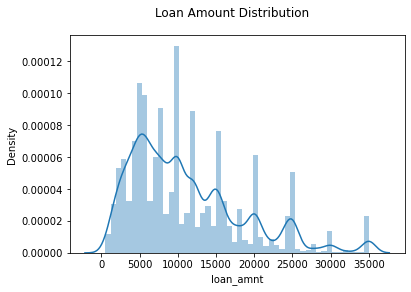

In [138]:
sns.distplot(df.loan_amnt)
plt.suptitle('Loan Amount Distribution')
plt.show()

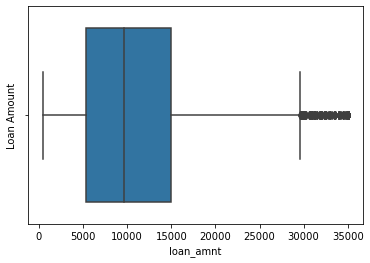

In [139]:
sns.boxplot( df.loan_amnt)
plt.ylabel('Loan Amount')
plt.show()

# Observations

Most of the borrowers took loans in the range 4000 to 15000 with meadian around 10000

Annual Income

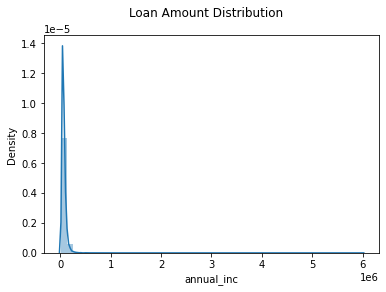

In [140]:
sns.distplot(df.annual_inc)
plt.suptitle('Loan Amount Distribution')
plt.show()

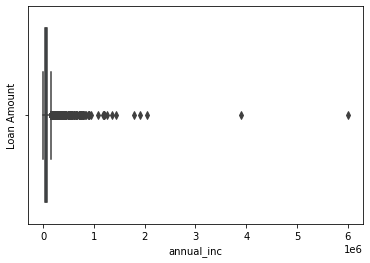

In [141]:
sns.boxplot( df.annual_inc)
plt.ylabel('Loan Amount')
plt.show()

In [142]:
df.annual_inc.value_counts()

60000.0     1466
50000.0     1029
40000.0      855
45000.0      811
30000.0      808
            ... 
80569.0        1
82116.0        1
242400.0       1
133300.0       1
27376.0        1
Name: annual_inc, Length: 5215, dtype: int64

Data for Annual income is skewed as Outliers have not been removed

# Bivariate Analysis

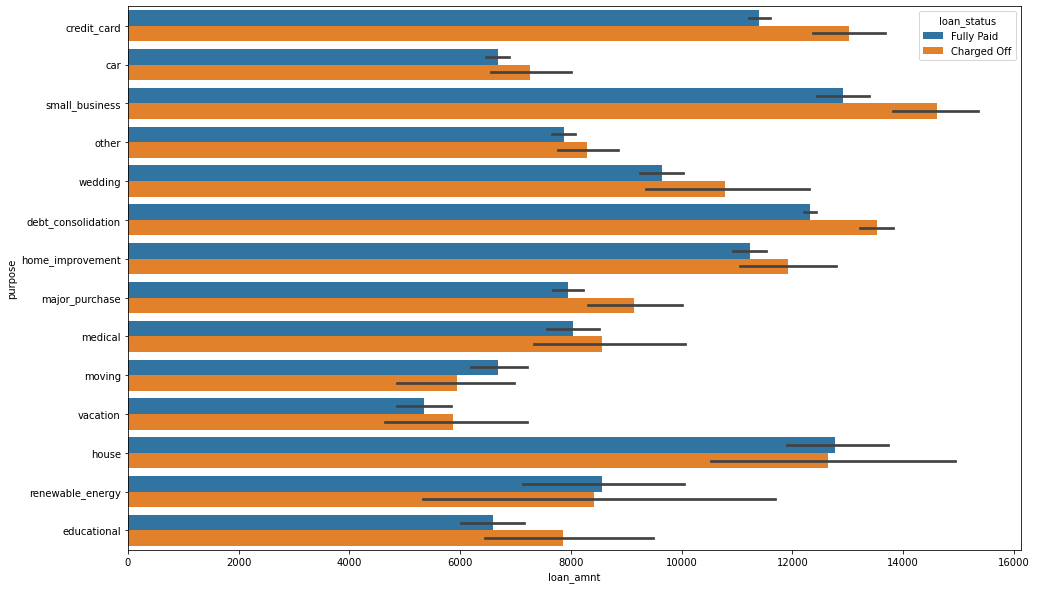

In [143]:
plt.figure(figsize=(16,10))
sns.barplot( x='loan_amnt', y='purpose', hue ='loan_status', data=df)
plt.show()

# Observations

 House loan borrowers default less in terms of defaulters vs fully paid
 Borrowers taking loan for small_business and loan amount more than 14000 are likely to default.

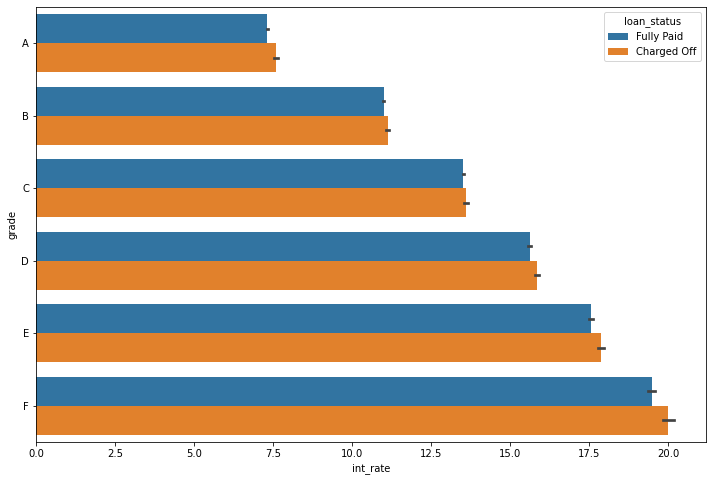

In [144]:
plt.figure(figsize=(12,8))
sns.barplot( x='int_rate', y='grade',hue ='loan_status', data=df ,order =['A','B','C','D','E','F' ])
plt.show()

# Observations

Borrowers with high grade and higher interest rate are likely to default more

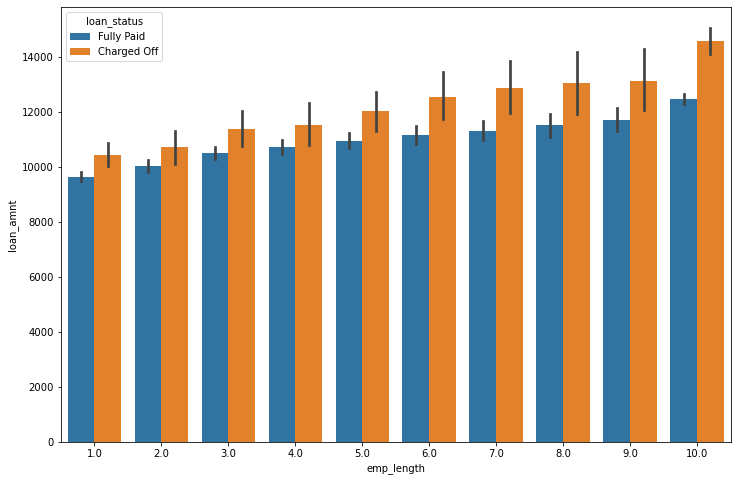

In [145]:
plt.figure(figsize=(12,8))
sns.barplot( x='emp_length', y='loan_amnt', hue ='loan_status', data=df )
plt.show()

### Observations

Employees with 10 years or more experience and loan amount of more than 12k are likely to default more

In [146]:
df_date = df['issue_d'].str.partition("-", True)     
df['issue_month']=df_date[0]                       
df['issue_year']='20' + df_date[2]

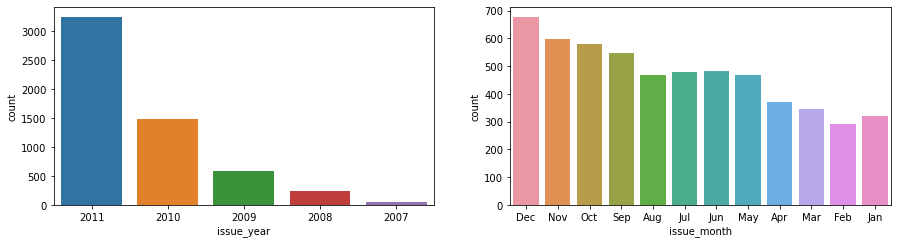

In [147]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.countplot(x='issue_year', data=df[df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_month', data=df[df['loan_status']=='Charged Off'])
plt.show()

### Observations

Most of defaults have occured in 2011 and towards end of year

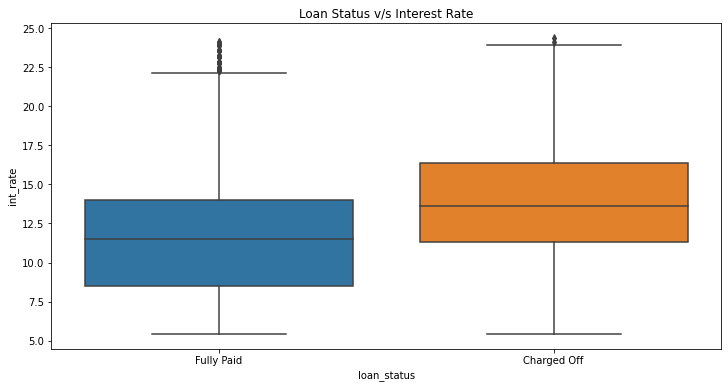

In [148]:
plt.figure(figsize=(12,6))
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title('Loan Status v/s Interest Rate')
plt.show()


# Observations

Borrowers having high interest rate are likely to default more

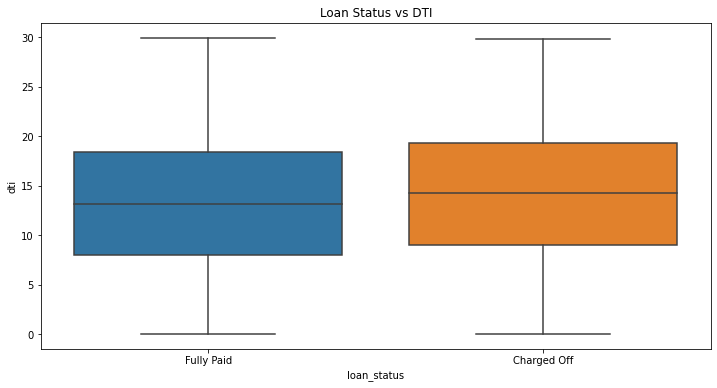

In [149]:
plt.figure(figsize=(12,6))
sns.boxplot(x='loan_status', y=df.dti, data=df)
plt.title('Loan Status vs DTI')
plt.show()

### Observations

Borrowers with high dti are likely to default more

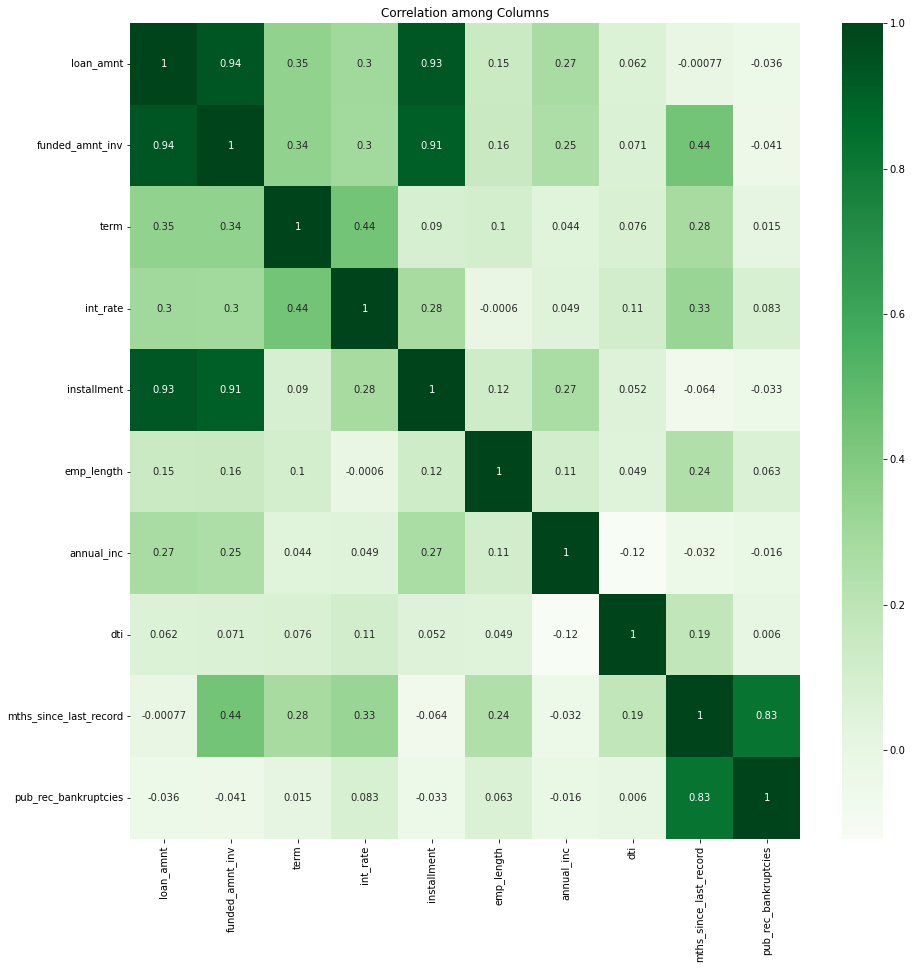

In [150]:
plt.figure(figsize=(15,15))
pf = sns.heatmap(df.corr(), annot = True, cmap= 'Greens')
plt.title("Correlation among Columns")
plt.show()